In [19]:
import pandas as pd
import sqlite3
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import re
import plotly.express as px

import plotly.graph_objects as go
from ipywidgets import widgets

import chart_studio.plotly as py

chart_studio.tools.set_credentials_file(username='ceverest', api_key='V6TM2axFVMohJrseeMna')

In [28]:
#Show all columns in dataframe by scrolling to the right
pd.options.display.max_columns = None
#Make each column accomodate full text
pd.set_option('display.max_colwidth', 0)
#Print up to 150 rows
pd.options.display.max_rows = 100

### Pulmonology

In [6]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    
    from_display_name,
    hospital_group,
    COUNT(DISTINCT(from_npi)) AS count_from_npi,
    COUNT(DISTINCT(to_facility)) AS count_facilities,
    SUM(patient_count) AS total_patients,
    SUM(transaction_count) AS total_transactions,
    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_display_name IN ('Pulmonary Disease Physician')
GROUP BY from_classification 
       , hospital_group
"""
#                            

pul= pd.read_sql(query,db)

db.close()
pul.shape

(11, 7)

In [7]:
pul

,from_display_name,hospital_group,count_from_npi,count_facilities,total_patients,total_transactions,trans_per_pt
0,Pulmonary Disease Physician,Ascension Saint Thomas,23,3,9310,11147,1.20
1,Pulmonary Disease Physician,HCA,22,8,9587,14306,1.49
2,Pulmonary Disease Physician,Macon County General Hospital,1,1,67,96,1.43
3,Pulmonary Disease Physician,Maury Regional Medical Center,2,1,1187,1923,1.62
4,Pulmonary Disease Physician,Nashville General Hosptial,2,1,91,209,2.30
5,Pulmonary Disease Physician,NorthCrest Medical Center,2,1,572,1056,1.85
6,Pulmonary Disease Physician,Riverview Regional Medical Center,2,1,133,197,1.48
7,Pulmonary Disease Physician,Sumner Regional Medical Center,3,1,1739,2773,1.59
8,Pulmonary Disease Physician,Trousdale Medical Center,2,1,91,119,1.31
9,Pulmonary Disease Physician,Vanderbilt University Medical Center,25,2,5206,9197,1.77


In [70]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'
query = """
SELECT
    from_display_name
    , from_npi
    , from_physician
    , hospital_group
    , SUM(COUNT(DISTINCT(hospital_group))) OVER (PARTITION BY from_physician) AS count_hospital_groups --- number of hospital groups to which provider refers
   , SUM(patient_count) AS total_patients
---    , SUM(transaction_count) AS total_transactions
    , ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
    , ROUND((SUM(patient_count)*1.00)/SUM(SUM(patient_count)) OVER (PARTITION BY from_physician),2) AS provider_patient_share  --- % share of providers patients referred to that group
---   , ROUND((SUM(patient_count)*1.00)/SUM(SUM(patient_count)) OVER (PARTITION BY from_classification),2)  AS market_patient_share
FROM hosp_refs
WHERE from_display_name IN ('Pulmonary Disease Physician')
GROUP BY from_npi, from_physician, hospital_group
ORDER BY total_patients DESC
"""

# SELECT d1, d2, sum(v)/sum(sum(v)) OVER (PARTITION BY d1) AS share
#FROM   test
#GROUP  BY d1, d2;                           

pulmonology= pd.read_sql(query,db)

db.close()
pulmonology.shape

(86, 8)

In [132]:
pods['provider_patient_share']=pods['provider_patient_share']*100

In [74]:
#Calculate physican's market share with patient volume as percent of all patients referred within speciality class
pulmonology['market_share'] = ((pulmonology['total_patients'] / pulmonology['total_patients'].sum()) * 100).round(2)

In [77]:
pulmonology

,from_display_name,from_npi,from_physician,hospital_group,count_hospital_groups,total_patients,trans_per_pt,provider_patient_share,market_share
0,Pulmonary Disease Physician,1932296035,ROBERT MILLER,Vanderbilt University Medical Center,1,878,2.04,1.00,3.02
1,Pulmonary Disease Physician,1801894142,MURRAY ARONS,HCA,1,873,1.37,1.00,3.00
2,Pulmonary Disease Physician,1407896749,ANGELO CANONICO,Ascension Saint Thomas,1,861,1.21,1.00,2.96
3,Pulmonary Disease Physician,1124246681,JOHN JENSEN,Maury Regional Medical Center,1,846,1.76,1.00,2.91
4,Pulmonary Disease Physician,1831139799,JON TUMEN,Ascension Saint Thomas,1,763,1.19,1.00,2.62
5,Pulmonary Disease Physician,1508838400,HERMOGENES BATTAD,Sumner Regional Medical Center,2,737,1.54,0.94,2.53
6,Pulmonary Disease Physician,1831289255,STACEY VALLEJO,Ascension Saint Thomas,1,735,1.28,1.00,2.53
7,Pulmonary Disease Physician,1568460640,JONATHAN EVANS,HCA,2,700,1.57,0.89,2.41
8,Pulmonary Disease Physician,1134211550,AARON MILSTONE,Williamson Medical Center,2,665,1.68,0.65,2.29
9,Pulmonary Disease Physician,1336147685,ORLANDO RODRIGUEZ,HCA,1,664,1.43,1.00,2.28


In [81]:
import plotly.express as px
df = pulmonology
fig = px.sunburst(df, path=['from_physician', 'hospital_group'], values='total_patients')
fig.show()

In [62]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#all_refs - 68 rows
#non_vandy_refs - 53
query = """
WITH all_refs AS 
    (
    SELECT
         from_npi
        , from_physician
        , SUM(COUNT(DISTINCT(hospital_group))) OVER (PARTITION BY from_physician) AS count_hospital_groups --- number of hospital groups to which provider refers
        , SUM(patient_count) AS total_patients
    FROM hosp_refs
    WHERE from_display_name IN ('Pulmonary Disease Physician')
    GROUP BY from_npi, from_physician
    ),

non_vandy_refs AS 
    (
    SELECT
          from_npi
        , from_physician
        
        , SUM(patient_count) AS non_vandy_pts
    FROM hosp_refs
    WHERE from_display_name IN ('Pulmonary Disease Physician')
    AND hospital_group <> 'Vanderbilt University Medical Center'
    GROUP BY from_npi, from_physician
    )
    
SELECT 
     all_refs.from_npi
    , all_refs.from_physician
    , count_hospital_groups
    , non_vandy_pts
    , total_patients
--    , ROUND(((non_vandy_pts*1.00)/total_patients)*100,2) AS pct_non_vandy
FROM all_refs
LEFT JOIN non_vandy_refs
ON non_vandy_refs.from_npi = all_refs.from_npi
ORDER BY total_patients DESC

---, non_vandy_refs.from_physician = all_refs.from_physician
"""

# SELECT d1, d2, sum(v)/sum(sum(v)) OVER (PARTITION BY d1) AS share
#FROM   test
#GROUP  BY d1, d2;                           

pul= pd.read_sql(query,db)

db.close()
pul.shape

(68, 5)

In [63]:
#Fill NAN with zero and cast as integer to remove trailing zeros
pul['non_vandy_pts'] = pul['non_vandy_pts'].fillna(0).astype(int)

#Calculate percent of patients not referred to Vanderbilt
pul['pct_non_vandy'] = ((pul['non_vandy_pts'] / pul['total_patients']) * 100).astype(int)

#Calculate physican's market share with patient volume as percent of all patients referred within speciality class
pul['market_share'] = ((pul['total_patients'] / pul['total_patients'].sum()) * 100).round(2)

In [64]:
pul.head()

,from_npi,from_physician,count_hospital_groups,non_vandy_pts,total_patients,pct_non_vandy,market_share
0,1134211550,AARON MILSTONE,2,665,1023,65,3.52
1,1932296035,ROBERT MILLER,1,0,878,0,3.02
2,1487723342,RAMESH CHADALAVADA,3,782,876,89,3.01
3,1801894142,MURRAY ARONS,1,873,873,100,3.00
4,1407896749,ANGELO CANONICO,1,861,861,100,2.96


In [65]:
pul

,from_npi,from_physician,count_hospital_groups,non_vandy_pts,total_patients,pct_non_vandy,market_share
0,1134211550,AARON MILSTONE,2,665,1023,65,3.52
1,1932296035,ROBERT MILLER,1,0,878,0,3.02
2,1487723342,RAMESH CHADALAVADA,3,782,876,89,3.01
3,1801894142,MURRAY ARONS,1,873,873,100,3.00
4,1407896749,ANGELO CANONICO,1,861,861,100,2.96
5,1124246681,JOHN JENSEN,1,846,846,100,2.91
6,1508838400,HERMOGENES BATTAD,2,788,788,100,2.71
7,1568460640,JONATHAN EVANS,2,700,784,89,2.70
8,1831139799,JON TUMEN,1,763,763,100,2.62
9,1831289255,STACEY VALLEJO,1,735,735,100,2.53


In [ ]:
query = """
SELECT
     from_npi
    , from_physician
    , SUM(COUNT(DISTINCT(hospital_group))) OVER (PARTITION BY from_physician) AS count_hospital_groups --- number of hospital groups to which provider refers
    , SUM(patient_count) AS total_patients
FROM hosp_refs
WHERE from_display_name IN ('Foot & Ankle Surgery Podiatrist',
                            'Foot Surgery Podiatrist',
                            'Podiatrist',
                            'Primary Podiatric Medicine Podiatrist')
GROUP BY from_npi, from_physician
ORDER BY total_patients DESC
"""

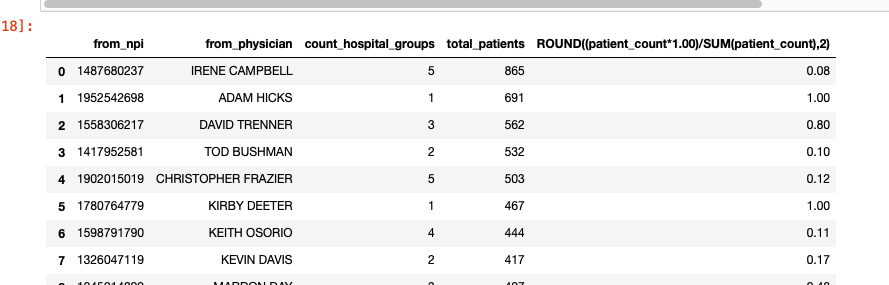

### Scraps

In [ ]:
WHERE from_grouping NOT IN ('Managed Care Organizations',
                            'Nursing Service Providers',
                            'Suppliers',
                            'Transportation Services',
                            'Managed Care Organizations',
                            'Dental Providers',
                            'Laboratories',
                            'Physician Assistants & Advanced Practice Nursing Providers',
                            'Student, Health Care'
                            )
AND from_classification NOT IN ('Radiology',
                            'Pathology',
                             'Anesthesiology',
                           'Emergency Medicine',
                             'Obstetrics & Gynecology',
                             'Pediatrics',
                             'Clinical Pharmacology',
                             'Anesthesiologist Assistant')